## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [6]:
df = pd.read_csv('./ab_data.csv')
df.head()

FileNotFoundError: File b'./ab_data.csv' does not exist

b. Use the below cell to find the number of rows in the dataset.

In [7]:
df.shape

NameError: name 'df' is not defined

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df["converted"].value_counts()[1]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
page_mismatch_df = df.query("group == 'treatment' and landing_page == 'old_page'")
group_mismatch_df = df.query("group == 'control' and landing_page == 'new_page'")
total_mismatch_number = page_mismatch_df.count()[0] + group_mismatch_df.count()[0]
total_mismatch_number


3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.drop(page_mismatch_df.index)
df2 = df2.drop(group_mismatch_df.index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>user_id</th>
      <th>timestamp</th>
      <th>group</th>
      <th>landing_page</th>
      <th>converted</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1899</th>
      <td>773192</td>
      <td>2017-01-09 05:37:58.781806</td>
      <td>treatment</td>
      <td>new_page</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2893</th>
      <td>773192</td>
      <td>2017-01-14 02:55:59.590927</td>
      <td>treatment</td>
      <td>new_page</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset=['user_id'], keep='last', inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2.groupby('group').mean()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>user_id</th>
      <th>converted</th>
    </tr>
    <tr>
      <th>group</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>control</th>
      <td>788164.072594</td>
      <td>0.120386</td>
    </tr>
    <tr>
      <th>treatment</th>
      <td>787845.719290</td>
      <td>0.118808</td>
    </tr>
  </tbody>
</table>
</div>

In [16]:
print('Given that an individual was in the \'control\' group, the probability they converted is 0.120386')

Given that an individual was in the 'control' group, the probability they converted is 0.120386


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
print('Given that an individual was in the \'treatment\' group, the probability they converted is 0.118808')

Given that an individual was in the 'treatment' group, the probability they converted is 0.118808


d. What is the probability that an individual received the new page?

In [18]:
len(df2.query("group == 'treatment'"))/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

** We can see that an individual was in the 'control' group, the probability they converted is 0.120386*, while an individual was in the 'treatment' group the probability they converted is 0.118808, so it seems old pages behave better a little bit, don't consider change aversion or test duration, we could say there isn't sufficient evidence to say that the new treatment page leads to more conversions*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypothesis**
- $H_{0}$ : $p_{old}$ - $p_{new}$>= 0
- $H_{1}$ : $p_{old}$ - $p_{new}$ < 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
n_new = len(df2.query("group == 'treatment'"))
n_new

145310

d. What is $n_{old}$?

In [22]:
n_old = len(df2.query("group == 'control'"))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1 - p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1 - p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

0.0007136793821636983

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

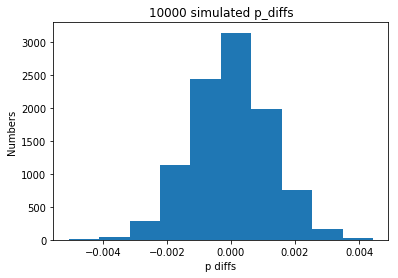

In [ ]:
plt.hist(p_diffs)
plt.xlabel('p diffs')
plt.ylabel('Numbers')
plt.title('10000 simulated p_diffs');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# compute actual observed difference
act_diff = df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean()
act_diff


-0.0015782389853555567

In [29]:
# Compute p-value
(p_diffs > act_diff).mean()

0.9034

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> The value is called p-value, this is the probabiity of observing our statistic or one more extreme in favor of the alternative if the null hypothesis is true.
> Here p-value is greater than type one error of rate 5%, so fail to reject $H_{0}$, that means old pages and new pages behave almost the same, old pages performed a little better.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm
# convert_old and convert_new are the number of converted for the count parameter of stats.proportions_ztest
convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
# n_old and n_new are for the nobs parameter of stats.proportions_ztest
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
"""
By checking the API doc of stats.proportions_ztest, 
it said in the two sample test, smaller means that the alternative hypothesis is p1 < p2 
and larger means p1 > p2 where p1 is the proportion of the first sample and p2 of the second one.
"""
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value


(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [32]:
from scipy.stats import norm
# Tell us how significant our z-score is
norm.cdf(z_score)

0.9050583127590245

In [33]:
# Tell us what our critical value at 95% confidence is
norm.ppf(1-0.05)

1.6448536269514722

>>Since the z-score of 1.3109241984234394 less than the critical value of 1.6448536269514722, we fail to reject the null hypothesis. and agree with the findings in parts j. and k.



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2['intercept'] = 1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2 = df2.drop('control', axis=1)
df2.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>user_id</th>
      <th>timestamp</th>
      <th>group</th>
      <th>landing_page</th>
      <th>converted</th>
      <th>intercept</th>
      <th>treatment</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>851104</td>
      <td>2017-01-21 22:11:48.556739</td>
      <td>control</td>
      <td>old_page</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>804228</td>
      <td>2017-01-12 08:01:45.159739</td>
      <td>control</td>
      <td>old_page</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>661590</td>
      <td>2017-01-11 16:55:06.154213</td>
      <td>treatment</td>
      <td>new_page</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>853541</td>
      <td>2017-01-08 18:28:03.143765</td>
      <td>treatment</td>
      <td>new_page</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>4</th>
      <td>864975</td>
      <td>2017-01-21 01:52:26.210827</td>
      <td>control</td>
      <td>old_page</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
import statsmodels.api as sm

logit = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<table class="simpletable">
<caption>Logit Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>     <td>converted</td>    <th>  No. Observations:  </th>   <td>290584</td>   
</tr>
<tr>
  <th>Model:</th>               <td>Logit</td>      <th>  Df Residuals:      </th>   <td>290582</td>   
</tr>
<tr>
  <th>Method:</th>               <td>MLE</td>       <th>  Df Model:          </th>   <td>     1</td>   
</tr>
<tr>
  <th>Date:</th>          <td>Thu, 26 Jul 2018</td> <th>  Pseudo R-squ.:     </th>  <td>8.077e-06</td> 
</tr>
<tr>
  <th>Time:</th>              <td>16:19:12</td>     <th>  Log-Likelihood:    </th> <td>-1.0639e+05</td>
</tr>
<tr>
  <th>converged:</th>           <td>True</td>       <th>  LL-Null:           </th> <td>-1.0639e+05</td>
</tr>
<tr>
  <th> </th>                      <td> </td>        <th>  LLR p-value:       </th>   <td>0.1899</td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>intercept</th> <td>   -1.9888</td> <td>    0.008</td> <td> -246.669</td> <td> 0.000</td> <td>   -2.005</td> <td>   -1.973</td>
</tr>
<tr>
  <th>treatment</th> <td>   -0.0150</td> <td>    0.011</td> <td>   -1.311</td> <td> 0.190</td> <td>   -0.037</td> <td>    0.007</td>
</tr>
</table>

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> the p-value assoxiated with **ab_page** is 0.190, and the reason it differ from the value found in Part II is because hypothesis here is 
> **Hypothesis**
- $H_{0}$ : $p_{old}$ - $p_{new}$ = 0
- $H_{1}$ : $p_{old}$ - $p_{new}$ != 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Age, backgroud might influence whether or not an individual converts, also change aversion. 
> Why it is a good idea to consider other factors to add into regression model is these all are limitations which should be remembered while makding the decision.
> The disadvantages is that even with additional factors we can't think out all influence.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [3]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

FileNotFoundError: File b'./countries.csv' does not exist

In [40]:
### Create the necessary dummy variables
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [46]:
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA', 'US']]
df_new.head()


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>country</th>
      <th>timestamp</th>
      <th>group</th>
      <th>landing_page</th>
      <th>converted</th>
      <th>intercept</th>
      <th>treatment</th>
      <th>CA</th>
      <th>US</th>
    </tr>
    <tr>
      <th>user_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>834778</th>
      <td>UK</td>
      <td>2017-01-14 23:08:43.304998</td>
      <td>control</td>
      <td>old_page</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>928468</th>
      <td>US</td>
      <td>2017-01-23 14:44:16.387854</td>
      <td>treatment</td>
      <td>new_page</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>822059</th>
      <td>UK</td>
      <td>2017-01-16 14:04:14.719771</td>
      <td>treatment</td>
      <td>new_page</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>711597</th>
      <td>UK</td>
      <td>2017-01-22 03:14:24.763511</td>
      <td>control</td>
      <td>old_page</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>710616</th>
      <td>UK</td>
      <td>2017-01-16 13:14:44.000513</td>
      <td>treatment</td>
      <td>new_page</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'US']])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<table class="simpletable">
<caption>Logit Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>     <td>converted</td>    <th>  No. Observations:  </th>   <td>290584</td>   
</tr>
<tr>
  <th>Model:</th>               <td>Logit</td>      <th>  Df Residuals:      </th>   <td>290581</td>   
</tr>
<tr>
  <th>Method:</th>               <td>MLE</td>       <th>  Df Model:          </th>   <td>     2</td>   
</tr>
<tr>
  <th>Date:</th>          <td>Thu, 26 Jul 2018</td> <th>  Pseudo R-squ.:     </th>  <td>1.521e-05</td> 
</tr>
<tr>
  <th>Time:</th>              <td>17:06:42</td>     <th>  Log-Likelihood:    </th> <td>-1.0639e+05</td>
</tr>
<tr>
  <th>converged:</th>           <td>True</td>       <th>  LL-Null:           </th> <td>-1.0639e+05</td>
</tr>
<tr>
  <th> </th>                      <td> </td>        <th>  LLR p-value:       </th>   <td>0.1984</td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>intercept</th> <td>   -1.9868</td> <td>    0.011</td> <td> -174.174</td> <td> 0.000</td> <td>   -2.009</td> <td>   -1.964</td>
</tr>
<tr>
  <th>CA</th>        <td>   -0.0507</td> <td>    0.028</td> <td>   -1.786</td> <td> 0.074</td> <td>   -0.106</td> <td>    0.005</td>
</tr>
<tr>
  <th>US</th>        <td>   -0.0099</td> <td>    0.013</td> <td>   -0.746</td> <td> 0.456</td> <td>   -0.036</td> <td>    0.016</td>
</tr>
</table>

In [49]:
np.exp(-0.0507), np.exp(-0.0099)

(0.13035418933417164, 0.1357826273831706)

In [55]:
1/np.exp(-0.0507)

1.052007243765014

In [56]:
1/np.exp(-0.0099)

1.009949167117542

**Conclusions from Regression**
> Old pages performs a little bit better than new pages. <br>So fail to reject Null hypothesis.

**Conclusion**
> Old pages performs a little bit better than new pages. <br>So fail to reject Null hypothesis